In [2]:
import tensorflow as tf

In [3]:
from PIL import Image as ig

In [4]:
vari1= ig.open('/Users/kulasekharmaganti/SummerProjects/Yash and Kula Summer projects/emotion detection dataset/test/angry/im87.png')

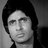

In [5]:
vari1

In [6]:
import numpy as np

In [7]:
img = vari1.getdata()

In [8]:
img

In [9]:
img_arr = np.array(img)

In [10]:
print(img_arr.shape)

(2304,)


In [11]:
np.max(img_arr)

208

In [12]:
ig_arr = img_arr/255

In [13]:
np.min(ig_arr)
np.max(ig_arr)

0.8156862745098039

In [14]:
n_classes = 7

In [15]:
import os

In [16]:
os.listdir()

['opencv_frame_4.png',
 'opencv_frame_4_actual.png',
 'webcamimagecapture.ipynb',
 'bgkulaact.png',
 'opencv_frame_2.png',
 'emotion detection dataset',
 '.DS_Store',
 'opencv_frame_3.png',
 'bag kula.png',
 'opencv_frame_1.png',
 'opencv_frame_0.png',
 'opencv_frame_1_actual.png',
 'test_train code.ipynb',
 'PILimage.ipynb',
 'opencv_frame_3_actual.png',
 'opencv_frame_0_actual.png',
 'grayscale_pixelresize.ipynb',
 '.ipynb_checkpoints',
 'opencv_frame_2_actual.png',
 'bgkula.png']

In [17]:
path = os.listdir('emotion detection dataset')

In [18]:
path_test = 'emotion detection dataset' + '/' + path[1]

In [19]:
path_train = 'emotion detection dataset' + '/' + path[2]

In [20]:
path_test

'emotion detection dataset/test'

In [21]:
os.listdir(path_test)

['happy',
 '.DS_Store',
 'sad',
 'fearful',
 'neutral',
 'angry',
 'disgusted',
 'surprised']

In [22]:
classes = os.listdir(path_test)

In [23]:
classes.remove(".DS_Store")

In [24]:
classes

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

In [25]:
n_classes = len(classes)

In [26]:
n_classes

7

In [27]:
X_test = []
y_test = []

In [28]:
X_test = []
y_test = []
X_train = []
y_train = []

for i in range(n_classes):
    temp_path = path_train + '/' + classes[i]
    current_image_path = os.listdir(temp_path)
    for j in range(len(current_image_path)):
        if current_image_path[j]=='.DS_Store':
            pass
        else:
            current_image = np.array(ig.open(temp_path + '/' + current_image_path[j]).getdata())
            X_train.append(current_image)
            y_train.append(classes[i])

In [29]:
for i in range(n_classes):
    temp_path = path_test + '/' + classes[i]
    current_image_path = os.listdir(temp_path)
    for j in range(len(current_image_path)):
        if current_image_path[j]=='.DS_Store':
            pass
        else:
            current_image = np.array(ig.open(temp_path + '/' + current_image_path[j]).getdata())
            X_test.append(current_image)
            y_test.append(classes[i])

In [30]:
len(X_test)

7178

In [31]:
len(y_test)

7178

In [32]:
len(X_train)

28709

In [33]:
len(y_train)

28709

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [35]:
classes

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

In [36]:
y_train_new = []
for i in range(len(y_train)):
    if (y_train[i]=='happy'):
        y_train_new.append(0)
    elif (y_train[i]=='sad'):
        y_train_new.append(1)
    elif (y_train[i]=='fearful'):
        y_train_new.append(2)
    elif (y_train[i]=='neutral'):
        y_train_new.append(3)
    elif (y_train[i]=='angry'):
        y_train_new.append(4)
    elif (y_train[i]=='disgusted'):
        y_train_new.append(5)
    elif (y_train[i]=='surprised'):
        y_train_new.append(6)

In [37]:
y_test_new = []
for i in range(len(y_test)):
    if (y_test[i]=='happy'):
        y_test_new.append(0)
    elif (y_test[i]=='sad'):
        y_test_new.append(1)
    elif (y_test[i]=='fearful'):
        y_test_new.append(2)
    elif (y_test[i]=='neutral'):
        y_test_new.append(3)
    elif (y_test[i]=='angry'):
        y_test_new.append(4)
    elif (y_test[i]=='disgusted'):
        y_test_new.append(5)
    elif (y_test[i]=='surprised'):
        y_test_new.append(6)

In [38]:
Y_train = np_utils.to_categorical(y_train_new, n_classes)
Y_test = np_utils.to_categorical(y_test_new, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape after one-hot encoding:  (28709, 7)


In [39]:
len(X_train)

28709

In [40]:
print('X_train shape = ()')

X_train shape = ()


In [41]:
np.sqrt(2304)

48.0

In [42]:
len(X_test)

7178

In [43]:
X_train = np.array(X_train)/255

In [44]:
X_test = np.array(X_test)/255

In [45]:
# building the input vector from the 48x48 pixels
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [46]:
'''
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(2304,), activation='relu'))
# output layer
model.add(Dense(7, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))'''

"\nmodel = Sequential()\n# hidden layer\nmodel.add(Dense(100, input_shape=(2304,), activation='relu'))\n# output layer\nmodel.add(Dense(7, activation='softmax'))\n\n# looking at the model summary\nmodel.summary()\n# compiling the sequential model\nmodel.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')\n# training the model for 10 epochs\nmodel.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))"

In [47]:
'''
# ADDED FIRST CONVOLUTION LAYER
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(48,48,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(7, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=45, validation_data=(X_test, Y_test))'''


"\n# ADDED FIRST CONVOLUTION LAYER\nmodel = Sequential()\n# convolutional layer\nmodel.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(48,48,1)))\nmodel.add(MaxPool2D(pool_size=(1,1)))\n# flatten output of conv\nmodel.add(Flatten())\n# hidden layer\nmodel.add(Dense(100, activation='relu'))\n# output layer\nmodel.add(Dense(7, activation='softmax'))\n\n# compiling the sequential model\nmodel.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')\n\n# training the model for 10 epochs\nmodel.fit(X_train, Y_train, batch_size=128, epochs=45, validation_data=(X_test, Y_test))"

In [48]:
# ADDED MORE CONVOLUTION LAYER
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(48,48,1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_data=(X_test, Y_test))

225/225 [==============================] - 219s 971ms/step - loss: 1.7614 - accuracy: 0.2784 - val_loss: 1.6115 - val_accuracy: 0.3546


In [137]:
yashhappy= ig.open('/Users/kulasekharmaganti/SummerProjects/Yash and Kula Summer projects/emotion detection dataset/test/fearful/im17.png')

In [59]:
array_str

['opencv_frame_4_actual.png',
 'opencv_frame_1_actual.png',
 'opencv_frame_3_actual.png',
 'opencv_frame_0_actual.png',
 'opencv_frame_2_actual.png']

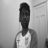

In [60]:
ig.open(array_str[0])

In [63]:
img1_array = []
for i in range(len(array)):
    img1_array.append(np.array(ig.open(array_str[i])))

In [64]:
img1_array 

[array([[177, 182, 187, ..., 187, 173, 176],
        [177, 181, 186, ..., 145, 171, 202],
        [178, 181, 184, ..., 158, 182, 207],
        ...,
        [108, 112, 120, ...,  68,  38,  30],
        [102, 104, 111, ...,  72,  45,  31],
        [ 97,  98, 103, ...,  73,  59,  32]], dtype=uint8),
 array([[177, 182, 188, ..., 186, 173, 176],
        [177, 182, 186, ..., 146, 172, 202],
        [177, 181, 184, ..., 159, 182, 207],
        ...,
        [107, 110, 118, ...,  68,  39,  29],
        [101, 102, 109, ...,  71,  45,  30],
        [ 97,  97, 103, ...,  73,  60,  32]], dtype=uint8),
 array([[177, 181, 186, ..., 186, 172, 178],
        [177, 181, 186, ..., 145, 172, 203],
        [177, 181, 186, ..., 159, 181, 206],
        ...,
        [108, 112, 119, ...,  69,  38,  29],
        [101, 103, 110, ...,  71,  45,  30],
        [ 96,  99, 104, ...,  74,  60,  33]], dtype=uint8),
 array([[178, 180, 187, ..., 187, 173, 176],
        [177, 181, 187, ..., 146, 171, 202],
        [177, 18

In [70]:
X_test = np.array(X_test)/255

In [71]:
img11_arr = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [74]:
img11_arr.shape

(7178, 48, 48, 1)

In [67]:
def prediction(array):
    prediction = []
    for i in range(len(array)):
        if (np.argmax(array[i])==0):
            prediction.append('happy')
        elif (np.argmax(array[i])==1):
            prediction.append('sad')
        elif (np.argmax(array[i])==2):
            prediction.append('fearful')
        elif (np.argmax(array[i])==3):
            prediction.append('neutral')
        elif (np.argmax(array[i])==4):
            prediction.append('angry')
        elif (np.argmax(array[i])==5):
            prediction.append('disgusted')
        elif (np.argmax(array[i])==6):
            prediction.append('surprised')
    return prediction

In [77]:
array_str = np.array(img1_array).reshape(np.array(img1_array).shape[0],48,48,1)

In [78]:
array = model.predict(array_str)
print(array)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [79]:
predictions = prediction(array)

In [80]:
predictions

['happy', 'happy', 'happy', 'happy', 'happy']

In [198]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

       angry       0.02      0.23      0.04        88
   disgusted       0.00      0.00      0.00        11
     fearful       0.03      0.16      0.05       179
       happy       0.31      0.44      0.37      1252
     neutral       0.20      0.19      0.20      1271
         sad       0.02      0.32      0.03        66
   surprised       0.81      0.16      0.26      4311

    accuracy                           0.21      7178
   macro avg       0.20      0.21      0.13      7178
weighted avg       0.58      0.21      0.26      7178



In [1]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyWindow("test")
cv2.waitKey(1)

import glob

array = glob.glob('opencv_frame_?.png')
from PIL import Image as ig
import cv2
for i in range(len(array)):
    image = cv2.imread(array[i])
    current_value = array[i].split('_')[-1].split('.')[0]
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    cv2.imwrite('bag kula.png', gray_img)

    kula1=ig.open('./bag kula.png')
    bgkula=kula1.resize((48,48))

    bgkula.save('opencv_frame_{}_actual.png'.format(current_value))
    

opencv_frame_0.png written!
opencv_frame_1.png written!
opencv_frame_2.png written!
opencv_frame_3.png written!
opencv_frame_4.png written!
Escape hit, closing...


In [57]:
array_str = glob.glob('opencv_frame_?_actual.png')

In [58]:
array_str

['opencv_frame_4_actual.png',
 'opencv_frame_1_actual.png',
 'opencv_frame_3_actual.png',
 'opencv_frame_0_actual.png',
 'opencv_frame_2_actual.png']